# Joukowski Transform

## 1. Complex numbers in Python

In [701]:
import math
import numpy
from matplotlib import pyplot
# embed figures into the notebook
%matplotlib inline

In [702]:
(2.75 + 3.69*1j)*(8.55 - 6.13*1j)

(46.1322+14.692000000000004j)

In [703]:
1.4*numpy.exp(5.32*1j)

(0.79927078585823497-1.1494199453957457j)

In [704]:
(7.51 - 9.15*1j)/(4.43 + 9.64*1j)

(-0.4880897698448308-1.0033441577191493j)

## 2. Shapes created by the Joukowski transformation

In [705]:
theta = numpy.linspace(0,2*numpy.pi,100)
r = 1.5
c = 1
z = r*numpy.exp(theta*1j) #Euler's formula:   r*e^(i*theta) = r * cos(theta) + r * i * sin(theta)
zeta = z+c**2/z

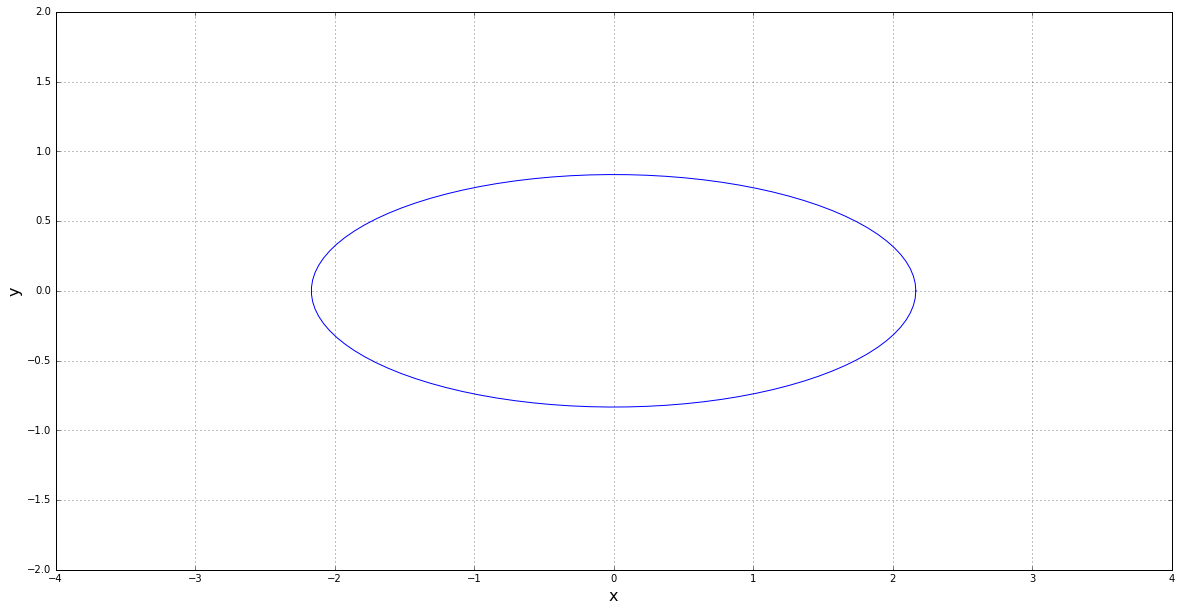

In [706]:
size = 20
x_start, x_end = -4, 4
y_start, y_end = -2, 2
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(zeta.real,zeta.imag)
pyplot.grid(1)

In [707]:
theta = numpy.linspace(0,2*numpy.pi,100)
r = 1.2
c = 1
epsilon_x = 0.15
epsilon_y = 0.0
epsilon = -1*epsilon_x + 1j*epsilon_y
z = r*numpy.exp(theta*1j)
z = z + epsilon
zeta = z+c**2/z

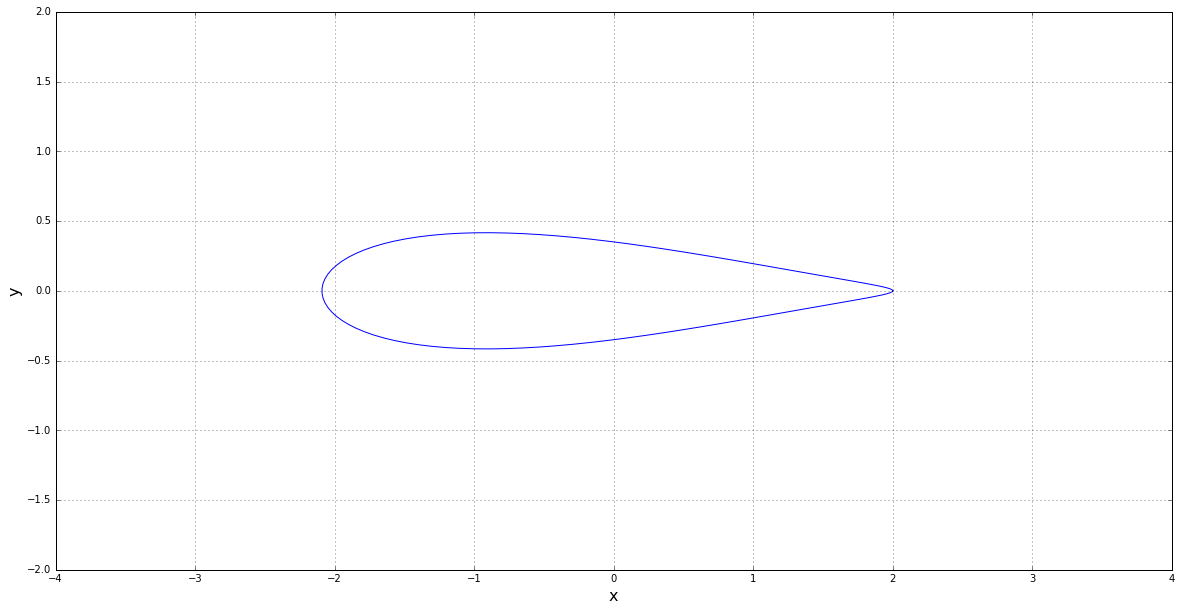

In [708]:
size = 20
x_start, x_end = -4, 4
y_start, y_end = -2, 2
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(zeta.real,zeta.imag)
pyplot.grid(1)

In [709]:
theta = numpy.linspace(0,2*numpy.pi,100)
r = 1
epsilon_x = 0.1
epsilon_y = 0.1

epsilon = -1*epsilon_x + 1j*epsilon_y
r_eps = math.sqrt(epsilon_x**2+epsilon_y**2)

z = r*numpy.exp(theta*1j)
z = z + epsilon
z = z + r_eps*numpy.exp(theta*1j)
zeta = z+r**2/z

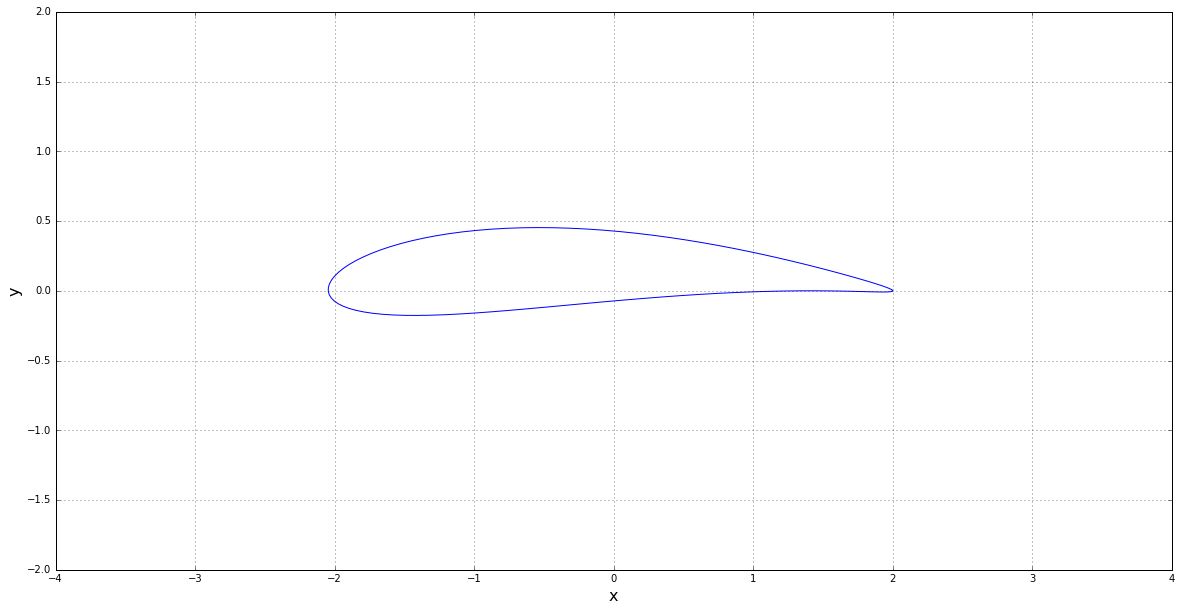

In [710]:
size = 20
x_start, x_end = -4, 4
y_start, y_end = -2, 2
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.plot(zeta.real,zeta.imag)
pyplot.grid(1)

## 3.Grid points on the  zz -plane using polar coordinates

In [711]:
N = 100
n = 145
radius = 1
r = numpy.linspace(radius, 5,N)
theta = numpy.linspace(0, 2*numpy.pi,n)
R, Theta = numpy.meshgrid(r,theta)

In [712]:
c = radius
epsilon_x = 0.15
epsilon_y = 0.0

epsilon = -1*epsilon_x + 1j*epsilon_y
r_eps = math.sqrt(epsilon_x**2+epsilon_y**2)

z = R*numpy.exp(Theta*1j)
z = z + epsilon
z = z + r_eps*numpy.exp(Theta*1j)
zeta = z+c**2/z

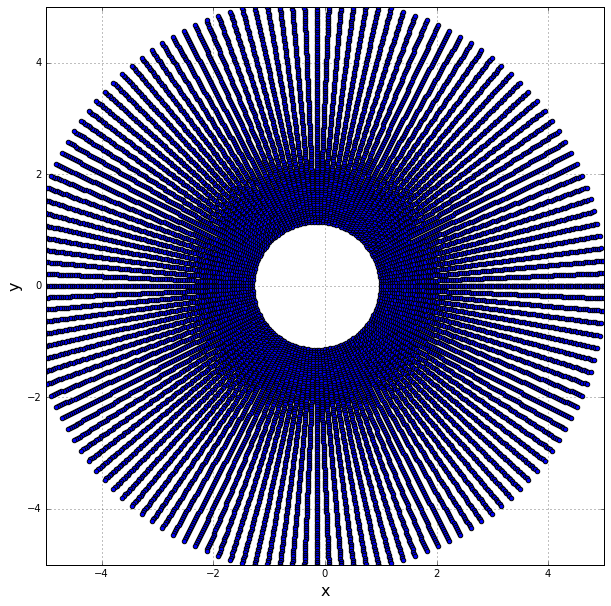

In [713]:
size = 10
x_start, x_end = -5, 5
y_start, y_end = -5, 5
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(z.real,z.imag)
pyplot.grid(1)

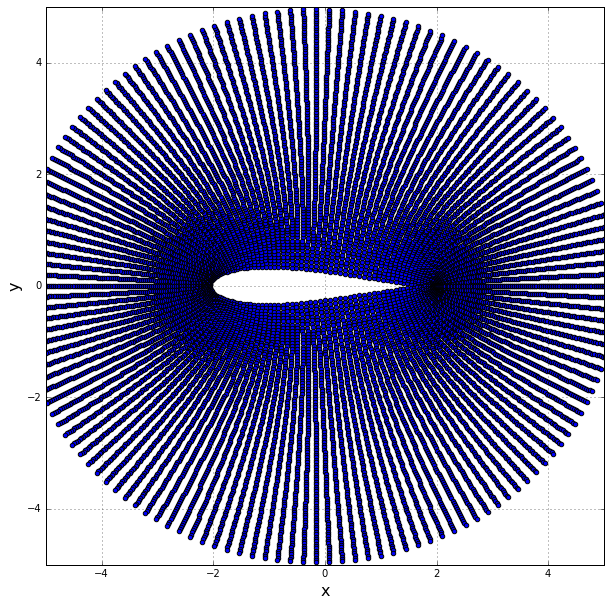

In [714]:
size = 10
x_start, x_end = -5, 5
y_start, y_end = -5, 5
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.scatter(zeta.real,zeta.imag)
pyplot.grid(1)

## 4. Flow over a symmetric Joukowski airfoil with zero angle of attack

In [715]:
u_inf = 1
kappa = 2 * numpy.pi * (numpy.sqrt(epsilon_y**2+epsilon_x**2)+radius)**2 * u_inf
x_doublet, y_doublet =  - epsilon_x, epsilon_y

In [716]:
def get_velocity_doublet(strength, xd, yd, X, Y):

    u = - strength/(2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = - strength/(2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):

    psi = - strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)
    
    return psi

In [717]:
# compute the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, z.real, z.imag)

# compute the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet,z.real, z.imag)

In [718]:
u_freestream = u_inf * numpy.ones((n, N), dtype=float)
v_freestream = numpy.zeros((n, N), dtype=float)

psi_freestream = u_inf * z.imag

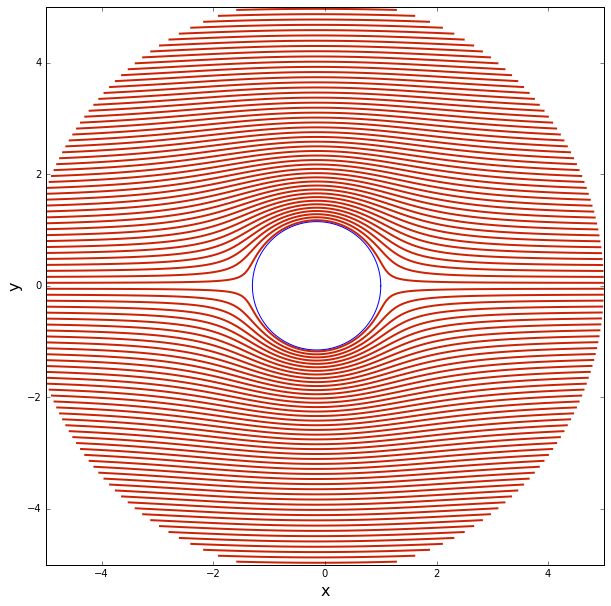

In [719]:
# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

# plot the streamlines
size = 10
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
# pyplot.streamplot(z.real, z.imag, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(z.real, z.imag, psi, levels = numpy.linspace(-5,5,100), colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.plot((z[:,0]).real,(z[:,0]).imag)

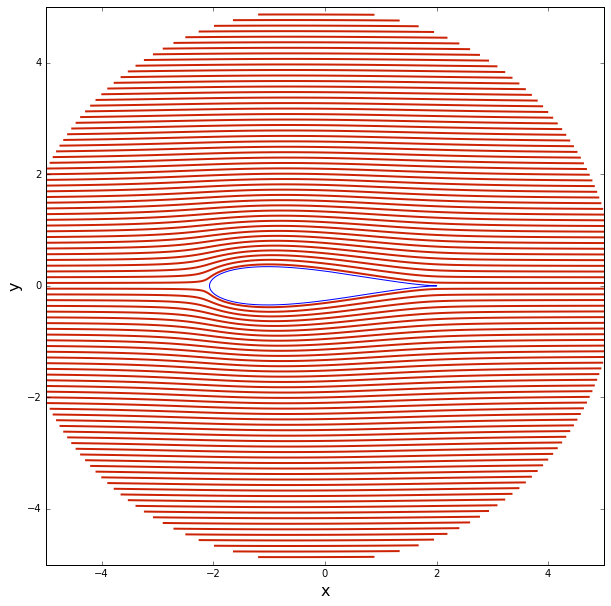

In [720]:
# plot the streamlines
size = 10
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
# pyplot.streamplot(z.real, z.imag, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(zeta.real, zeta.imag, psi, levels = numpy.linspace(-5,5,100), colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.plot((zeta[:,0]).real,(zeta[:,0]).imag)

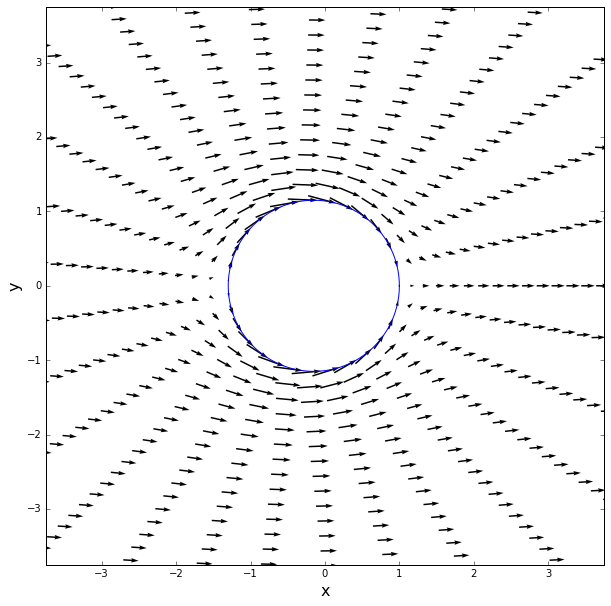

In [721]:
size = 10
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start*3/4, x_end*3/4)
pyplot.ylim(y_start*3/4, y_end*3/4)
pyplot.quiver(z.real[::5, ::5], z.imag[::5, ::5], u[::5, ::5], v[::5, ::5],units='xy',pivot='tip',width=0.02,scale=5)
pyplot.plot((z[:,0]).real,(z[:,0]).imag)

In [722]:
w = (u-1j*v)/(1-(c/z)**2)

/home/gil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


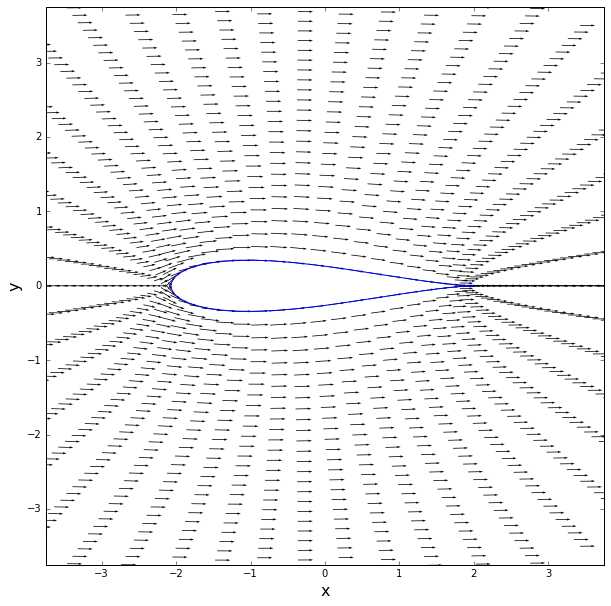

In [723]:
size = 10
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start*3/4, x_end*3/4)
pyplot.ylim(y_start*3/4, y_end*3/4)
pyplot.quiver(zeta.real[::3, ::3], zeta.imag[::3, ::3], w.real[::3, ::3], -w.imag[::3, ::3],
              units='xy',pivot='tip',width=0.01,scale=5)
pyplot.plot((zeta[:,0]).real,(zeta[:,0]).imag)

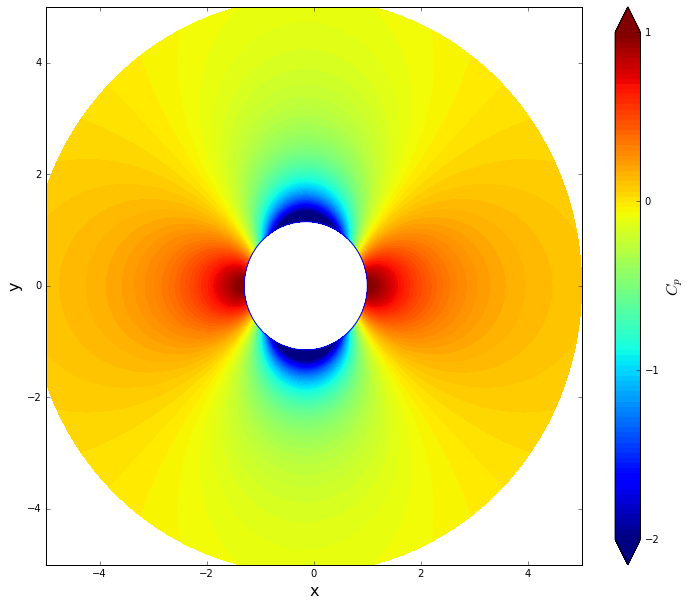

In [724]:
# compute the pressure coefficient field
cp = 1.0 - (u**2+v**2)/u_inf**2

# plot the pressure coefficient field
size = 10
pyplot.figure(figsize=(1.2*size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(z.real, z.imag, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.plot((z[:,0]).real,(z[:,0]).imag)

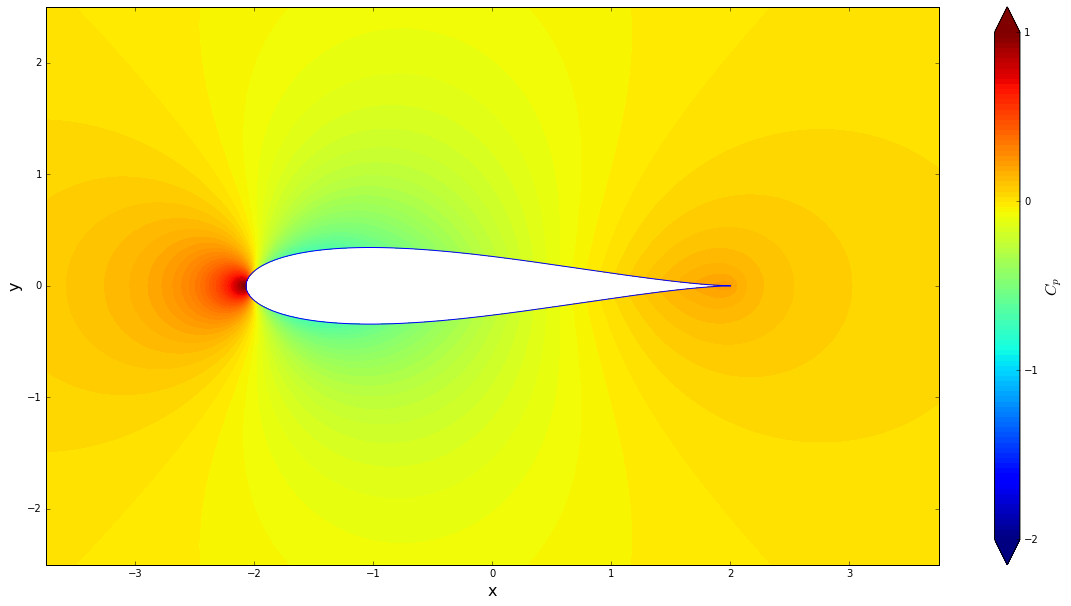

In [725]:
cp_zeta = 1.0 - (w.real**2+w.imag**2)/u_inf**2

size = 10
pyplot.figure(figsize=(2*size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start*3/4, x_end*3/4)
pyplot.ylim(y_start/2, y_end/2)
contf = pyplot.contourf(zeta.real, zeta.imag, cp_zeta, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.plot((zeta[:,0]).real,(zeta[:,0]).imag)

### Answers

In [726]:
kappa

8.3095125687450011

In [727]:
(u[61][0]-1j*v[61][0])/(1-(c/z[61][0])**2)

(1.1063384662852433-0.52363334929849636j)

In [728]:
cp_zeta[0][0]=1
numpy.amin(cp_zeta)

-0.68775567409240423

## 5. Flow over a symmetric Joukowski airfoil with non-zero angle of attack, without circulation

In [729]:
epsilon_x = 0.15
epsilon_y = 0.0
alpha = 20/180*numpy.pi

epsilon = -1*epsilon_x + 1j*epsilon_y
r_eps = math.sqrt(epsilon_x**2+epsilon_y**2)
aoa = numpy.exp(-1j*alpha)

z = R*numpy.exp(Theta*1j)
z1 = z * aoa ##rotation before translate
z = z + epsilon
z = z + r_eps*numpy.exp(Theta*1j)
z1 = z1 + epsilon
z1 = z1 + r_eps*numpy.exp(Theta*1j)

zeta = z+c**2/z

In [730]:
# compute the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, z1.real, z1.imag)

# compute the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet,z1.real, z1.imag)

In [731]:
u_freestream = u_inf * numpy.ones((n, N), dtype=float)
v_freestream = numpy.zeros((n, N), dtype=float)

psi_freestream = u_inf * z1.imag

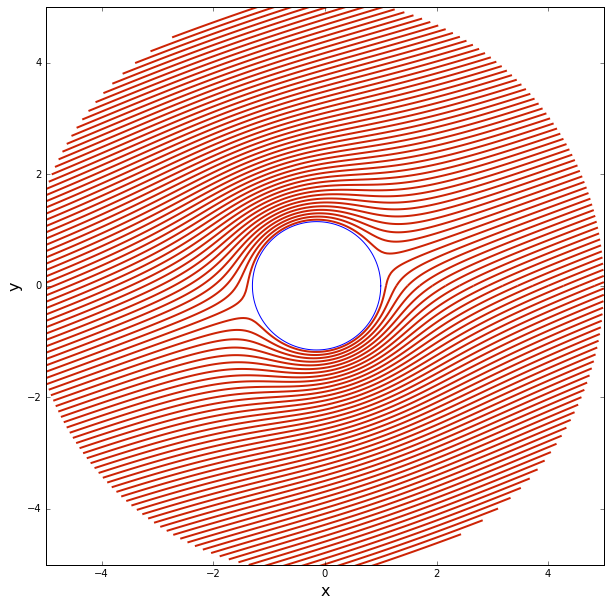

In [732]:
# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

# plot the streamlines
size = 10
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
# pyplot.streamplot(z.real, z.imag, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(z.real, z.imag, psi, levels = numpy.linspace(-5,5,100), colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.plot((z[:,0]).real,(z[:,0]).imag)

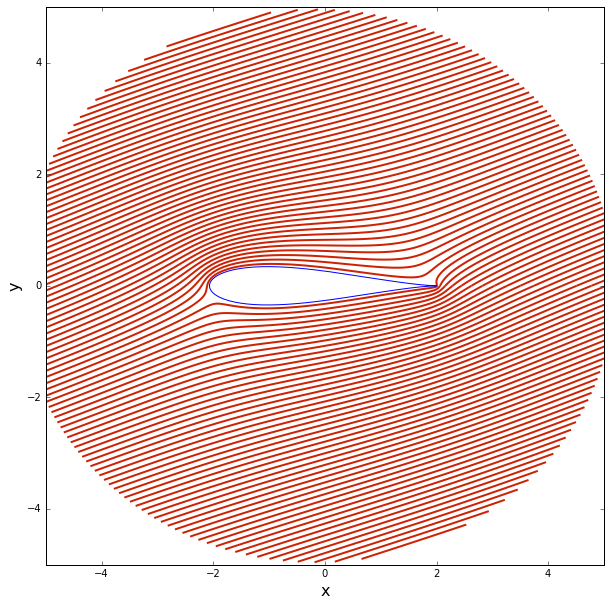

In [733]:
# plot the streamlines
size = 10
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
# pyplot.streamplot(z.real, z.imag, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(zeta.real, zeta.imag, psi, levels = numpy.linspace(-5,5,100), colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.plot((zeta[:,0]).real,(zeta[:,0]).imag)

In [734]:
w_z = (u-1j*v)*aoa

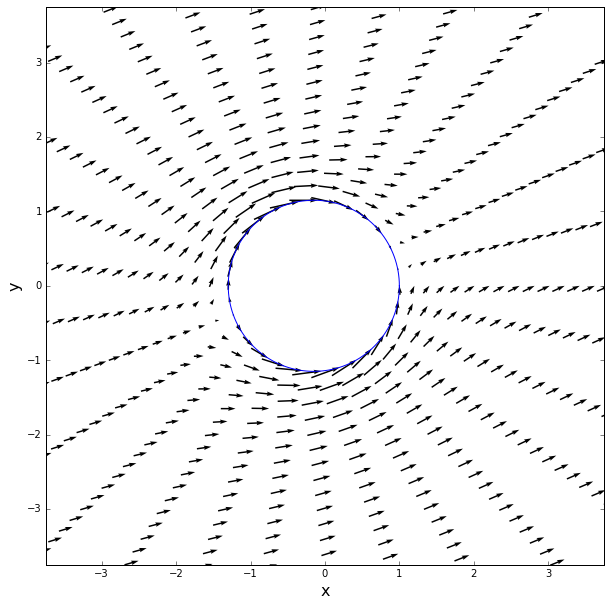

In [735]:
size = 10
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start*3/4, x_end*3/4)
pyplot.ylim(y_start*3/4, y_end*3/4)
pyplot.quiver(z.real[::5, ::5], z.imag[::5, ::5], w_z.real[::5, ::5], -w_z.imag[::5, ::5],units='xy',pivot='tip',width=0.02,scale=5)
pyplot.plot((z[:,0]).real,(z[:,0]).imag)

In [736]:
w = (w_z.real+1j*w_z.imag)/(1-(c/z)**2)

/home/gil/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


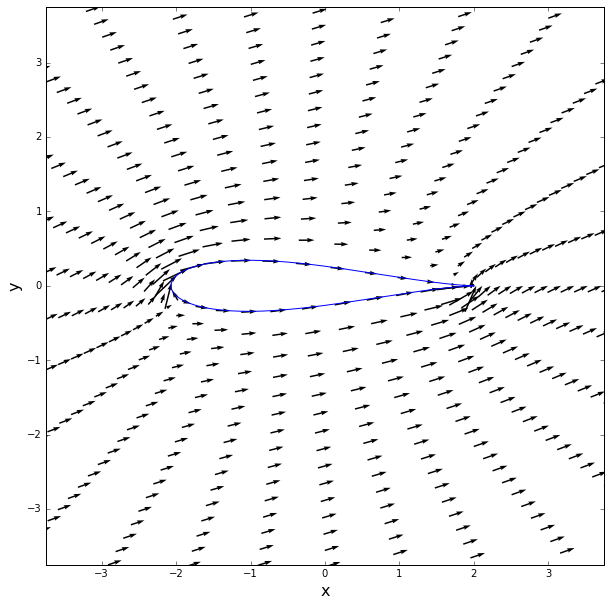

In [737]:
size = 10
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start*3/4, x_end*3/4)
pyplot.ylim(y_start*3/4, y_end*3/4)
pyplot.quiver(zeta.real[::5, ::5], zeta.imag[::5, ::5], w.real[::5, ::5], -w.imag[::5, ::5],units='xy',pivot='tip',width=0.02,scale=5)
pyplot.plot((zeta[:,0]).real,(zeta[:,0]).imag)

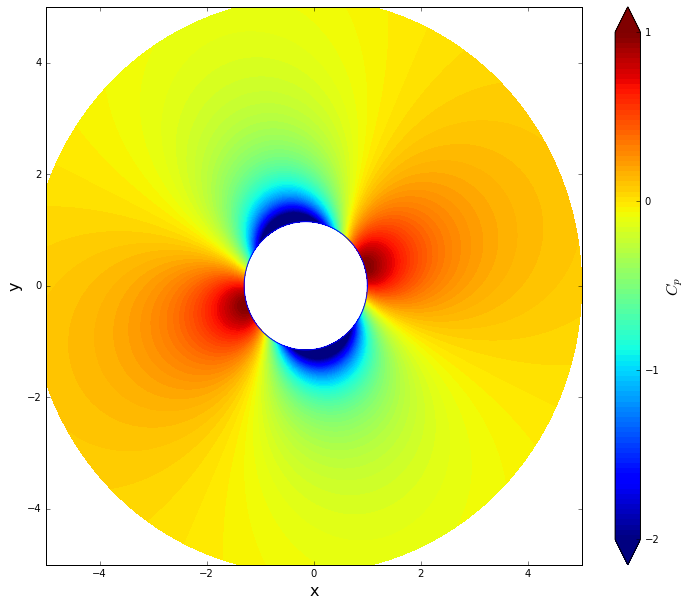

In [ ]:
# compute the pressure coefficient field
cp = 1.0 - (w_z.real**2+w_z.imag**2)/u_inf**2

# plot the pressure coefficient field
size = 10
pyplot.figure(figsize=(1.2*size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(z.real, z.imag, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.plot((z[:,0]).real,(z[:,0]).imag)

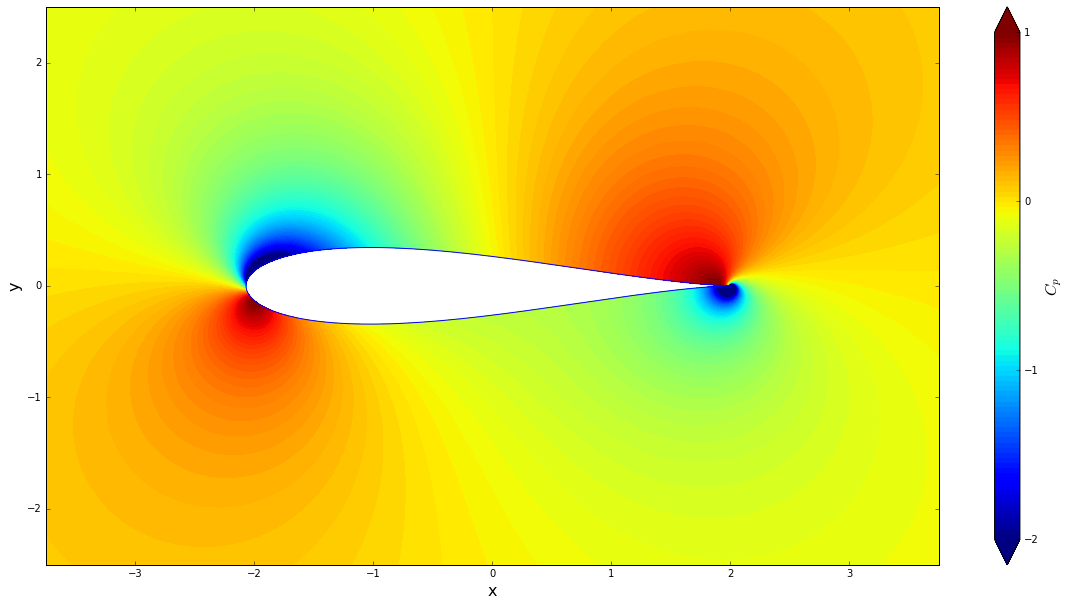

In [ ]:
cp_zeta = 1.0 - (w.real**2+w.imag**2)/u_inf**2

size = 10
pyplot.figure(figsize=(2*size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start*3/4, x_end*3/4)
pyplot.ylim(y_start/2, y_end/2)
contf = pyplot.contourf(zeta.real, zeta.imag, cp_zeta, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.plot((zeta[:,0]).real,(zeta[:,0]).imag)

In [ ]:
w_resultant = (w.real**2+w.imag**2)**0.5
numpy.where(w_resultant == numpy.amin(w_resultant))

(array([7]), array([0]))

In [ ]:
w_resultant[7][0] = 1
numpy.where(w_resultant == numpy.amin(w_resultant))

(array([79]), array([0]))

In [ ]:
w[49][0]

(1.4710688297862808-0.16067909135263614j)

In [ ]:
cp_zeta[74][0]

## 6. Flow over a symmetric Joukowski airfoil with non-zero angle of attack, with circulation

In [ ]:
gamma = 4*numpy.pi*u_inf*(radius+r_eps)*numpy.sin(alpha)

In [ ]:
def get_velocity_vortex(strength, xv, yv, X, Y):

    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    return u, v

def get_stream_function_vortex(strength, xv, yv, X, Y):

    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi

In [ ]:
# compute the velocity field on the mesh grid
u_vortex, v_vortex = get_velocity_vortex(gamma, -epsilon_x, epsilon_y, z1.real, z1.imag)

# compute the stream-function on the mesh grid
psi_vortex = get_stream_function_vortex(gamma, -epsilon_x, -epsilon_y, z1.real, z1.imag)

In [ ]:
u = u_freestream + u_doublet + u_vortex
v = v_freestream + v_doublet + v_vortex
psi = psi_freestream + psi_doublet + psi_vortex

In [ ]:
# plot the streamlines
size = 10
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start*3/4, x_end*3/4)
pyplot.ylim(y_start*3/4, y_end*3/4)
# pyplot.streamplot(z.real, z.imag, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(z.real, z.imag, psi, levels = numpy.linspace(-5,5,100), colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.plot((z[:,0]).real,(z[:,0]).imag)

In [ ]:
# plot the streamlines
size = 10
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
# pyplot.streamplot(z.real, z.imag, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour((zeta*aoa).real, (zeta*aoa).imag, psi, levels = numpy.linspace(-5,5,100), colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.plot(((zeta[:,0])*aoa).real,((zeta[:,0])*aoa).imag)

In [ ]:
w_z = (u-1j*v)*aoa

In [ ]:
size = 10
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start*3/4, x_end*3/4)
pyplot.ylim(y_start*3/4, y_end*3/4)
pyplot.quiver(z.real[::5, ::5], z.imag[::5, ::5], w_z.real[::5, ::5], -w_z.imag[::5, ::5],units='xy',pivot='tip',width=0.02,scale=5)
pyplot.plot((z[:,0]).real,(z[:,0]).imag)

In [ ]:
w = (w_z.real+1j*w_z.imag)/(1-(c/z)**2)

In [ ]:
size = 10
pyplot.figure(figsize=(size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start*3/4, x_end*3/4)
pyplot.ylim(y_start*3/4, y_end*3/4)
pyplot.quiver(zeta.real[::5, ::5], zeta.imag[::5, ::5], w.real[::5, ::5], -w.imag[::5, ::5],units='xy',pivot='tip',width=0.02,scale=5)
pyplot.plot((zeta[:,0]).real,(zeta[:,0]).imag)

In [ ]:
# compute the pressure coefficient field
cp = 1.0 - (w_z.real**2+w_z.imag**2)/u_inf**2

# plot the pressure coefficient field
size = 10
pyplot.figure(figsize=(1.2*size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(z.real, z.imag, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.plot((z[:,0]).real,(z[:,0]).imag)

In [ ]:
cp_zeta = 1.0 - (w.real**2+w.imag**2)/u_inf**2

size = 10
pyplot.figure(figsize=(2*size, size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start*3/4, x_end*3/4)
pyplot.ylim(y_start/2, y_end/2)
contf = pyplot.contourf(zeta.real, zeta.imag, cp_zeta, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.plot((zeta[:,0]).real,(zeta[:,0]).imag, )

In [ ]:
cp_zeta = 1.0 - (w.real**2+w.imag**2)/u_inf**2

size = 10
pyplot.figure(figsize=(2*size, size))
pyplot.xlabel('$x^\prime$', fontsize=16)
pyplot.ylabel('$y^\prime$', fontsize=16)
pyplot.xlim(x_start*3/4, x_end*3/4)
pyplot.ylim(y_start/2, y_end/2)
contf = pyplot.contourf((zeta*aoa).real, (zeta*aoa).imag, cp_zeta, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.plot(((zeta[:,0])*aoa).real,((zeta[:,0])*aoa).imag)

In [ ]:
gamma